In [33]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [31]:
train_data=train_data.dropna()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [34]:
test_data=test_data.dropna()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.0 KB


In [4]:
test_data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [5]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
X = train_data['x'].values
Y = train_data['y'].values

# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [8]:
m = len(X)

# using the formula to calculate m & c
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = 1.0006563818563046 
c = -0.10726546430100825


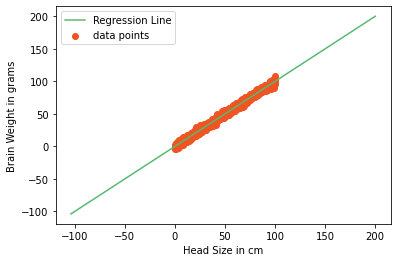

In [9]:
max_x = np.max(X) + 100
min_x = np.min(Y) - 100

# calculating line values x and y
x = np.linspace (min_x, max_x, 100)
y = c + m * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='data points')

plt.xlabel('Head Size in cm')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [10]:
# calculating R-squared value for measuring goodness of our model. 

ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals

for i in range(len(x)): # val_count represents the no.of input x values
    y_pred = c + m * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.9891072265885439


In [11]:
m

1.0006563818563046

In [12]:
c

-0.10726546430100825

In [13]:
test_x=test_data['x'].values
Y_test = test_data['y'].values

In [14]:
test_x

array([ 77,  21,  22,  20,  36,  15,  62,  95,  20,   5,   4,  19,  96,
        62,  36,  15,  65,  14,  87,  69,  89,  51,  89,  27,  97,  58,
        79,  21,  93,  27,  99,  31,  33,  80,  28,  47,  53,  69,  28,
        33,  91,  71,  50,  76,   4,  37,  70,  68,  40,  35,  94,  88,
        52,  31,  59,   0,  39,  64,  69,  57,  13,  72,  76,  61,  82,
        18,  41,  50,  55,  13,  46,  13,  79,  53,  15,  28,  81,  69,
        52,  84,  68,  27,  56,  48,  40,  39,  82, 100,  59,  43,  67,
        38,  63,  91,  60,  14,  21,  87,  73,  32,   2,  82,  19,  74,
        42,  12,   1,  90,  89,   0,  41,  16,  94,  97,  66,  24,  17,
        90,  13,   0,  64,  96,  98,  12,  41,  47,  78,  20,  89,  29,
        64,  75,  12,  25,  28,  30,  65,  59,  64,  53,  71,  97,  73,
         9,  12,  63,  99,  60,  35,   2,  60,  32,  94,  84,  63,  22,
        81,  93,  33,   7,  42,  46,  54,  16,  49,  43,  95,  66,  21,
        35,  80,  37,  54,  56,   1,  32,  58,  32,  46,  72,  1

In [15]:
test_y = []

for i in range(len(test_x)):
    y=c + m * test_x[i]
    test_y.append(y)

In [16]:
test_y

[76.94327593863444,
 20.906518554681387,
 21.907174936537693,
 19.90586217282508,
 35.916364282525954,
 14.90258026354356,
 61.93343021078987,
 94.95509081204793,
 19.90586217282508,
 4.896016444980514,
 3.89536006312421,
 18.90520579096878,
 95.95574719390423,
 61.93343021078987,
 35.916364282525954,
 14.90258026354356,
 64.93539935635879,
 13.901923881687257,
 86.9498397571975,
 68.93802488378401,
 88.9511525209101,
 50.926210010370525,
 88.9511525209101,
 26.910456845819215,
 96.95640357576053,
 57.930804683364656,
 78.94458870234705,
 20.906518554681387,
 92.95377804833532,
 26.910456845819215,
 98.95771633947314,
 30.913082373244432,
 32.91439513695704,
 79.94524508420335,
 27.91111322767552,
 46.92358448294531,
 52.92752277408314,
 68.93802488378401,
 27.91111322767552,
 32.91439513695704,
 90.9524652846227,
 70.93933764749661,
 49.92555362851422,
 75.94261955677814,
 3.89536006312421,
 36.917020664382264,
 69.93868126564031,
 67.93736850192771,
 39.91898980995117,
 34.9157079006

In [17]:
Y_test

array([ 79.77515201,  23.17727887,  25.60926156,  17.85738813,
        41.84986439,   9.80523488,  58.87465933,  97.61793701,
        18.39512747,   8.74674765,   2.81141583,  17.09537241,
        95.14907176,  61.38800663,  40.24701716,  14.82248589,
        66.95806869,  16.63507984,  90.65513736,  77.22982636,
        92.11906278,  46.91387709,  89.82634442,  21.71380347,
        97.41206981,  57.01631363,  78.31056542,  19.1315097 ,
        93.03483388,  26.59112396,  97.55155344,  31.43524822,
        35.12724777,  78.61042432,  33.07112825,  51.69967172,
        53.62235225,  69.46306072,  27.42497237,  36.34644189,
        95.06140858,  68.16724757,  50.96155532,  78.04237454,
         5.60766487,  36.11334779,  67.2352155 ,  65.01324035,
        38.14753871,  34.31141446,  95.28503937,  87.84749912,
        54.08170635,  31.93063515,  59.61247085,  -1.04011421,
        47.49374765,  62.60089773,  70.9146434 ,  56.14834113,
        14.05572877,  68.11367147,  75.59701346,  59.22

In [25]:
mean_y = np.mean(Y_test)
for i in range(len(test_x)): # val_count represents the no.of input x values
    y_pred = c + m * test_x[i]
    ss_t += (Y_test[i] - mean_y) ** 2
    ss_r += (Y_test[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
rmse = ss_r/len(Y_test)
print(r2)

0.988824176470064


In [26]:
rmse

40.679215299364756

In [27]:
import math
math.sqrt(rmse)

6.378025971988885